# Strategic Bidding Analysis (Case: 5bus_nrel)

In this analysis, we want to study an effective structure for PQ-Curves that helps us build optimal bidding strategies in electricity markets.

## Dependencies and Data Preparation

#### Packages and Diretory

In [1]:
#make sure it is in "GridAnalysis.jl" cd("C:/Users/Daniele/Desktop/Projeto/GridAnalysis.jl")

In [2]:
pwd()

"C:\\Users\\Daniele\\Desktop\\Projeto\\GridAnalysis.jl"

In [3]:
using Pkg
Pkg.activate("./examples/5bus_nrel/bid_analysis_5bus_nrel")

In [4]:
Pkg.instantiate()

In [5]:
using Logging 
Logging.disable_logging(Logging.Info) #script to disable info messages 
Logging.disable_logging(Logging.Warn) #script to disable warning messages

LogLevel(1001)

In [6]:
using Dates
using DataFrames
using GridAnalysis
using Gurobi
using PowerSystems
using PowerSimulations
using Test
using Measures
using Plots

┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase C:\Users\Daniele\.julia\packages\RecipesBase\92zOw\src\RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase C:\Users\Daniele\.julia\packages\RecipesBase\92zOw\src\RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase C:\Users\Daniele\.julia\packages\RecipesBase\92zOw\src\RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase C:\Users\Daniele\.julia\packages\RecipesBase\92zOw\src\RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase C:\Users\Daniele\.j

#### Uploading Utils

Might not work if running lines manually 
(solution: edit to be the path for this examples directory for example: 'example_dir = "./examples/5bus_nrel/"')

In [7]:
example_dir = "./examples/5bus_nrel/"
data_dir = joinpath(example_dir, "data")
include(joinpath(example_dir, "utils.jl"))

load_plot_set_of_simulations

#### Data Prep and Build Market Simulator
define solvers for Unit Commitment (UC), Real Time (RT) and Economic Dispatch (ED)

In [8]:
solver_uc = optimizer_with_attributes(Gurobi.Optimizer)
solver_rt = optimizer_with_attributes(Gurobi.Optimizer)
solver_ed = optimizer_with_attributes(Gurobi.Optimizer)

MathOptInterface.OptimizerWithAttributes(Gurobi.Optimizer, Pair{MathOptInterface.AbstractOptimizerAttribute, Any}[])

## Define analysis to be done

In [9]:
Network = [DCPPowerModel, NFAPowerModel, CopperPlatePowerModel];
Ramp = [true]; 
Minimal_generation = [true]; 
Reserve = [true]; 
Offer_Bus = ["bus5"]; 
bidding_period = [collect(1:24)];


#### Create a DataFrame where each line represents one analysis 

In [44]:
df = DataFrame(Network = [], 
               Ramp = [],
               Minimal_generation = [],
               Reserve = [],
               Offer_Bus = [],
               bidding_period = []) 

for a in Network 
    for b in Ramp 
        for c in Minimal_generation 
            for d in Reserve
                for e in Offer_Bus
                    for f in bidding_period
                        new_data = DataFrame(Network = [Dict("DA"=>a, "RT"=>a)], 
                        Ramp = [Dict("DA"=>b, "RT"=>b)],
                        Minimal_generation = [Dict("DA"=>c, "RT"=>c)],
                        Reserve = [d],
                        Offer_Bus = [e],
                        bidding_period = [f])
                        append!(df, new_data)
                    end
                end
            end
        end
    end
end


new_data_1 = DataFrame(Network = [Dict("DA"=>DCPPowerModel, "RT"=>DCPPowerModel)],
Ramp = [Dict("DA"=>true, "RT"=>true)],
Minimal_generation = [Dict("DA"=>false, "RT"=>false)],
Reserve = [true],
Offer_Bus = ["bus5"],
bidding_period = [collect(1:24)])
append!(df, new_data_1)

new_data_2 = DataFrame(Network = [Dict("DA"=>DCPPowerModel, "RT"=>DCPPowerModel)],
Ramp = [Dict("DA"=>true, "RT"=>true)],
Minimal_generation = [Dict("DA"=>true, "RT"=>true)],
Reserve = [false],
Offer_Bus = ["bus5"],
bidding_period = [collect(1:24)])
append!(df, new_data_2)

df[!,1:6]

,Network,Ramp
,Any,Any
1,"Dict(""RT""=>DCPPowerModel, ""DA""=>DCPPowerModel)","Dict(""RT""=>1, ""DA""=>1)"
2,"Dict(""RT""=>NFAPowerModel, ""DA""=>NFAPowerModel)","Dict(""RT""=>1, ""DA""=>1)"
3,"Dict(""RT""=>CopperPlatePowerModel, ""DA""=>CopperPlatePowerModel)","Dict(""RT""=>1, ""DA""=>1)"
4,"Dict(""RT""=>DCPPowerModel, ""DA""=>DCPPowerModel)","Dict(""RT""=>1, ""DA""=>1)"
5,"Dict(""RT""=>DCPPowerModel, ""DA""=>DCPPowerModel)","Dict(""RT""=>1, ""DA""=>1)"


#### Define range quota and period to be analysed

In [45]:
range_quota = Float64.(collect(0:0.1:4));
initial_time = Date("2020-01-01");
period_analysed = [5,19];
initial_bidding_time = DateTime("2020-01-01");
path = "results";

## Run all the simulations

In [46]:
lines=[1,2,3,4,5]
period_analysed=[[5],[19]] 

2-element Vector{Vector{Int64}}:
 [5]
 [19]

In [47]:
run_set_of_simulations(df, data_dir, example_dir, solver_uc, solver_ed, solver_rt,
    range_quota, initial_time, initial_bidding_time, path)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
  Step:                  1
  problem:               RT
  Simulation Timestamp:  2020-01-01T23:55:00


### Generate graphics 

#### Generation stack virtual

In [48]:
graphic="plot_generation_stack_virtual"
plt_g=load_plot_set_of_simulations(
    df, 
    data_dir, 
    example_dir, 
    solver_uc, 
    solver_ed, 
    solver_rt, 
    range_quota, 
    initial_time,
    lines,
    period_analysed,
    initial_bidding_time,
    path,
    graphic,
    true,
)

        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).


5×2×2 Array{Any, 3}:
[:, :, 1] =
 Plot{Plots.GRBackend() n=6}  Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}  Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}  Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}  Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}  Plot{Plots.GRBackend() n=6}

[:, :, 2] =
 Plot{Plots.GRBackend() n=5}  Plot{Plots.GRBackend() n=5}
 Plot{Plots.GRBackend() n=5}  Plot{Plots.GRBackend() n=5}
 Plot{Plots.GRBackend() n=5}  Plot{Plots.GRBackend() n=5}
 Plot{Plots.GRBackend() n=5}  Plot{Plots.GRBackend() n=5}
 Plot{Plots.GRBackend() n=5}  Plot{Plots.GRBackend() n=5}

#### Revenue curves (renewable plus virtual)

In [49]:
graphic="plot_revenue_curves_renewable_plus_virtual"
plt_rv=load_plot_set_of_simulations(
    df, 
    data_dir, 
    example_dir, 
    solver_uc, 
    solver_ed, 
    solver_rt, 
    range_quota, 
    initial_time,
    lines,
    period_analysed,
    initial_bidding_time,
    path,
    graphic,
    true,
)

        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).


5-element Vector{Any}:
 Plot{Plots.GRBackend() n=9}
 Plot{Plots.GRBackend() n=9}
 Plot{Plots.GRBackend() n=9}
 Plot{Plots.GRBackend() n=9}
 Plot{Plots.GRBackend() n=9}

#### Price curves

In [50]:
graphic="plot_price_curves"
plt_p_t=load_plot_set_of_simulations(
    df, 
    data_dir, 
    example_dir, 
    solver_uc, 
    solver_ed, 
    solver_rt, 
    range_quota, 
    initial_time,
    lines,
    period_analysed,
    initial_bidding_time,
    path,
    graphic,
    true,
)
plt_p_f=load_plot_set_of_simulations(
    df, 
    data_dir, 
    example_dir, 
    solver_uc, 
    solver_ed, 
    solver_rt, 
    range_quota, 
    initial_time,
    lines,
    period_analysed,
    initial_bidding_time,
    path,
    graphic,
    false,
)

        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).


5×2 Matrix{Any}:
 Plot{Plots.GRBackend() n=2}  Plot{Plots.GRBackend() n=2}
 Plot{Plots.GRBackend() n=2}  Plot{Plots.GRBackend() n=2}
 Plot{Plots.GRBackend() n=2}  Plot{Plots.GRBackend() n=2}
 Plot{Plots.GRBackend() n=2}  Plot{Plots.GRBackend() n=2}
 Plot{Plots.GRBackend() n=2}  Plot{Plots.GRBackend() n=2}

#### Sum of virtual revenue curves 

In [51]:
graphic="plot_sum_revenue_curves"
sum_periods=[collect(1:24)]
plt_sr=load_plot_set_of_simulations(
    df, 
    data_dir, 
    example_dir, 
    solver_uc, 
    solver_ed, 
    solver_rt, 
    range_quota, 
    initial_time,
    lines,
    sum_periods,
    initial_bidding_time,
    path,
    graphic,
    true,
)

        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).


5-element Vector{Any}:
 Plot{Plots.GRBackend() n=1}
 Plot{Plots.GRBackend() n=1}
 Plot{Plots.GRBackend() n=1}
 Plot{Plots.GRBackend() n=1}
 Plot{Plots.GRBackend() n=1}

## Network analysis

### CASE1: DC

In [52]:
df[1,:]

,Network,Ramp,Minimal_generation
,Any,Any,Any
1,"Dict(""RT""=>DCPPowerModel, ""DA""=>DCPPowerModel)","Dict(""RT""=>1, ""DA""=>1)","Dict(""RT""=>1, ""DA""=>1)"


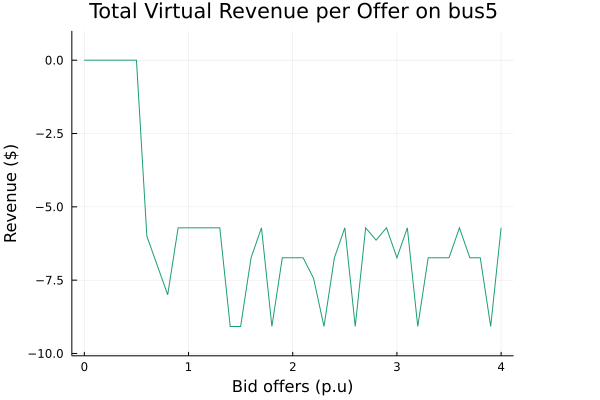

In [53]:
plt_sr[1]

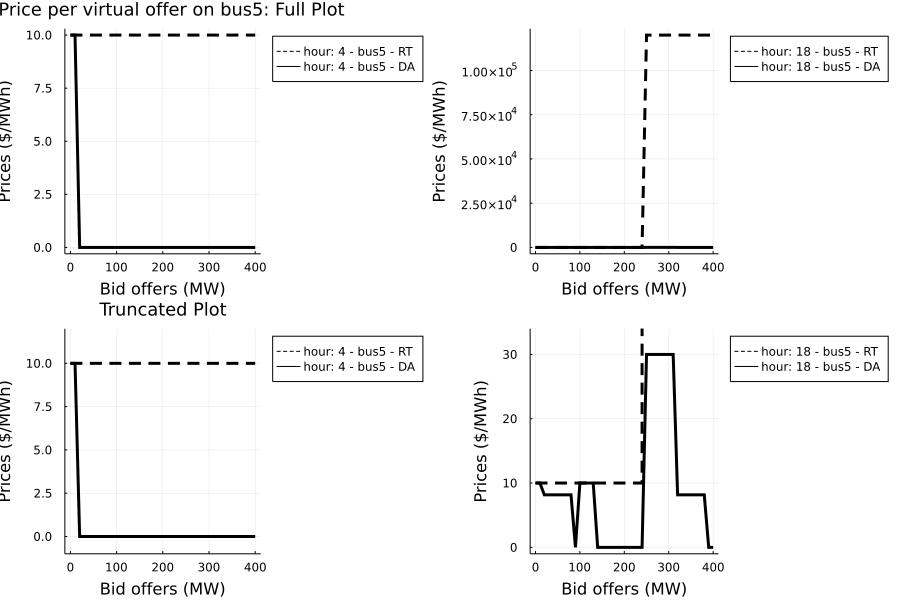

In [54]:
l = @layout grid(2,2)
#l = @layout [a{0.3w} [grid(2,2) b{0.2h}]]

plot(plt_p_f[1,1],plt_p_f[1,2],plt_p_t[1,1],plt_p_t[1,2],layout=l,size=(900,600),title=title=["   Price per virtual offer on bus5: Full Plot" "" "Truncated Plot" ""], titlefont = font(12)) 

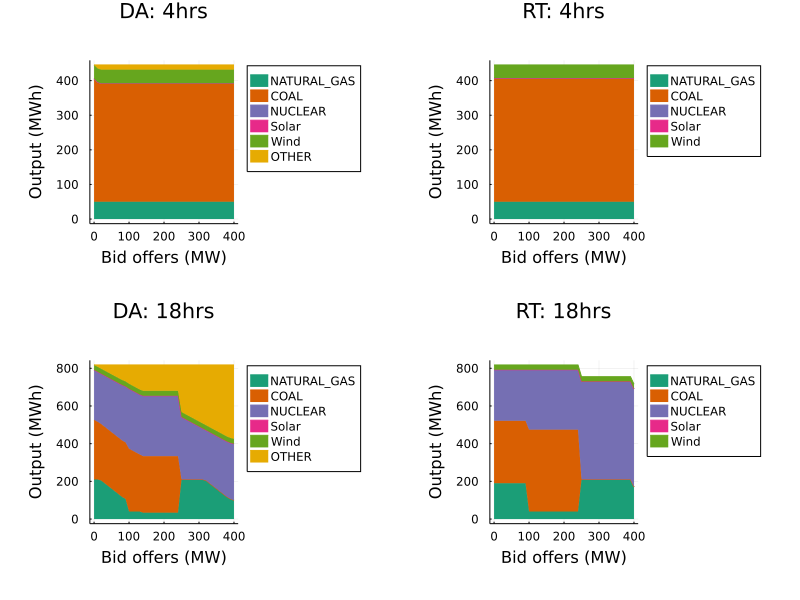

In [55]:
plot(plt_g[1,1,1], plt_g[1,1,2],plt_g[1,2,1], plt_g[1,2,2],layout=4,title=["DA: 4hrs" "RT: 4hrs" "DA: 18hrs" "RT: 18hrs"])

### CASE2: NFA 

In [56]:
df[2,:]

,Network,Ramp,Minimal_generation
,Any,Any,Any
2,"Dict(""RT""=>NFAPowerModel, ""DA""=>NFAPowerModel)","Dict(""RT""=>1, ""DA""=>1)","Dict(""RT""=>1, ""DA""=>1)"


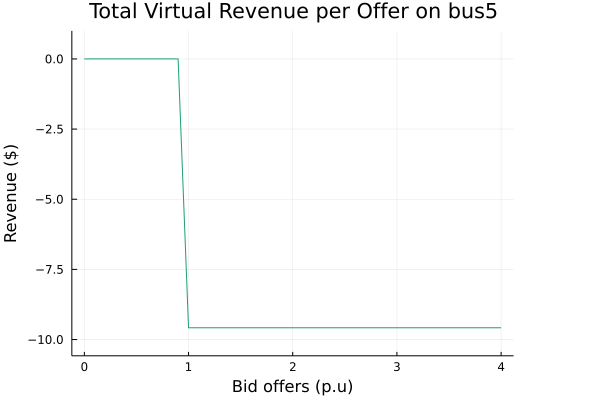

In [57]:
plt_sr[2]

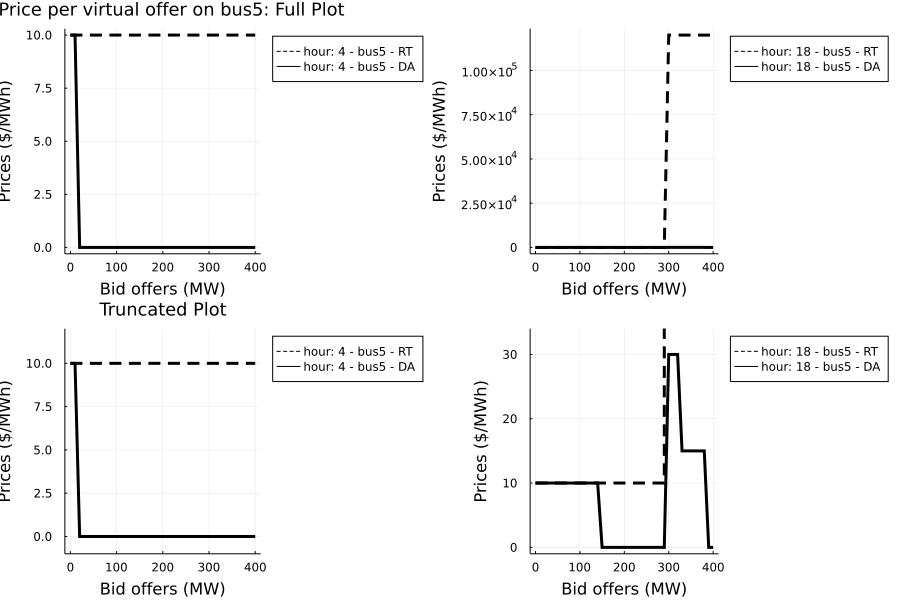

In [58]:
l = @layout grid(2,2)
#l = @layout [a{0.3w} [grid(2,2) b{0.2h}]]

plot(plt_p_f[2,1],plt_p_f[2,2],plt_p_t[2,1],plt_p_t[2,2],layout=l,size=(900,600),title=title=["   Price per virtual offer on bus5: Full Plot" "" "Truncated Plot" ""], titlefont = font(12)) 

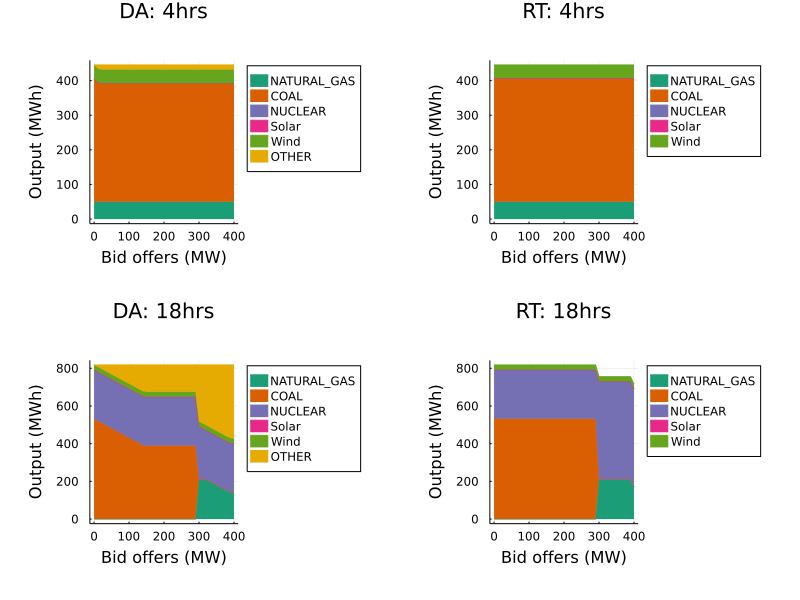

In [59]:
plot(plt_g[2,1,1], plt_g[2,1,2],plt_g[2,2,1], plt_g[2,2,2],layout=4,title=["DA: 4hrs" "RT: 4hrs" "DA: 18hrs" "RT: 18hrs"])

### CASE3: CopperPlate

In [60]:
df[3,:]

,Network,Ramp
,Any,Any
3,"Dict(""RT""=>CopperPlatePowerModel, ""DA""=>CopperPlatePowerModel)","Dict(""RT""=>1, ""DA""=>1)"


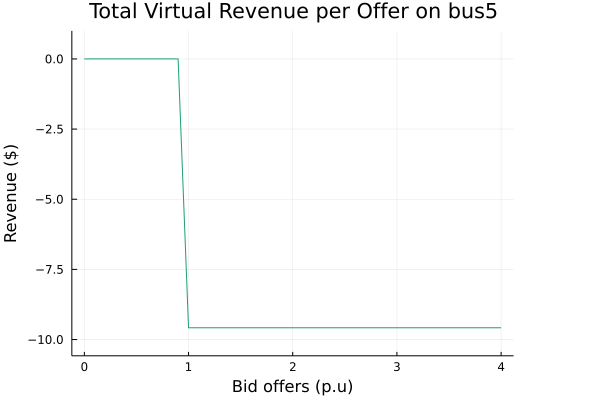

In [61]:
plt_sr[3]

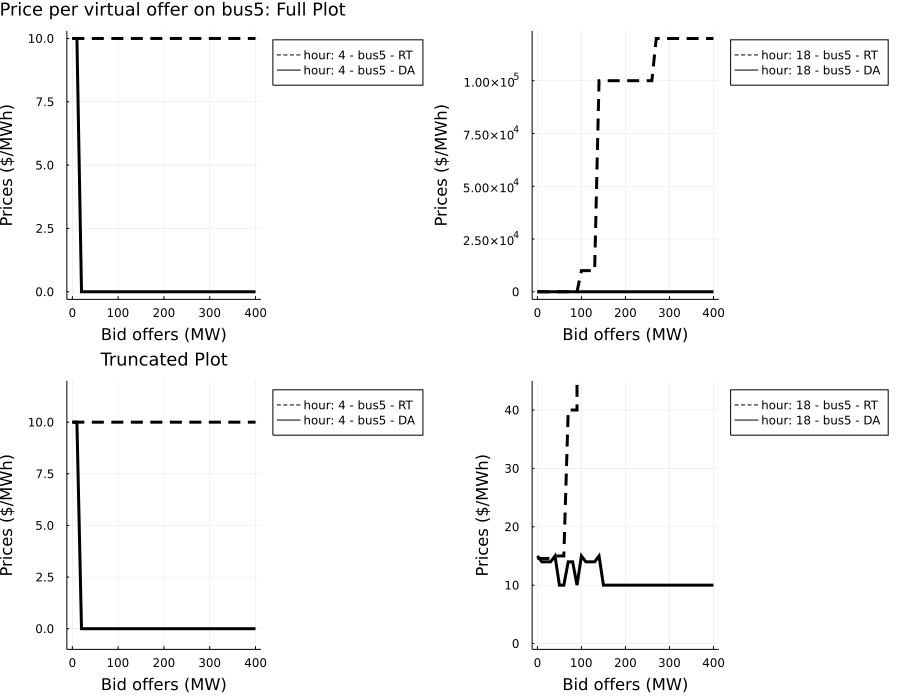

In [62]:
l = @layout grid(2,2)
#l = @layout [a{0.3w} [grid(2,2) b{0.2h}]]

plot(plt_p_f[3,1],plt_p_f[3,2],plt_p_t[3,1],plt_p_t[3,2],layout=l,size=(900,700),title=title=["   Price per virtual offer on bus5: Full Plot" "" "Truncated Plot" ""], titlefont = font(12)) 

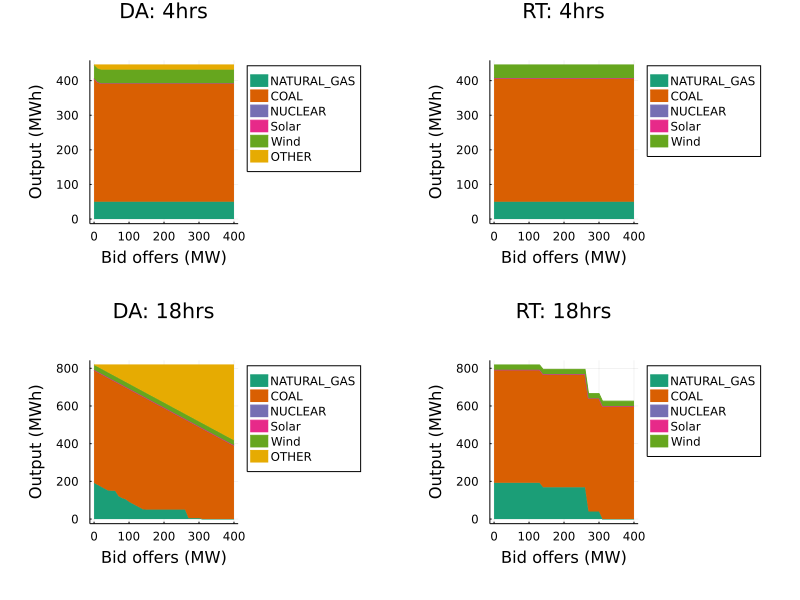

In [63]:
plot(plt_g[3,1,1], plt_g[3,1,2],plt_g[3,2,1], plt_g[3,2,2],layout=4,title=["DA: 4hrs" "RT: 4hrs" "DA: 18hrs" "RT: 18hrs"])

##  System capacities analysis

### CASE4: Minimal generation false 

In [64]:
df[4,:]

,Network,Ramp,Minimal_generation
,Any,Any,Any
4,"Dict(""RT""=>DCPPowerModel, ""DA""=>DCPPowerModel)","Dict(""RT""=>1, ""DA""=>1)","Dict(""RT""=>0, ""DA""=>0)"


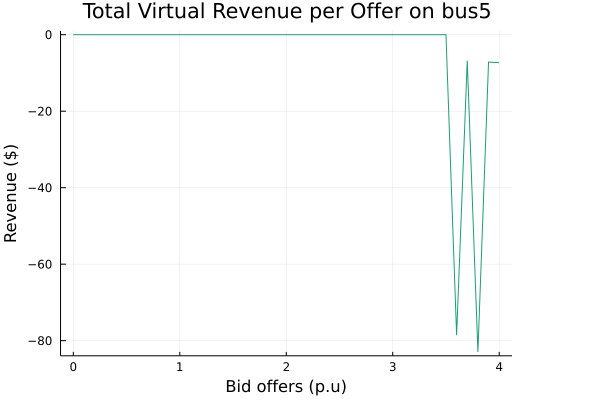

In [65]:
plt_sr[4]

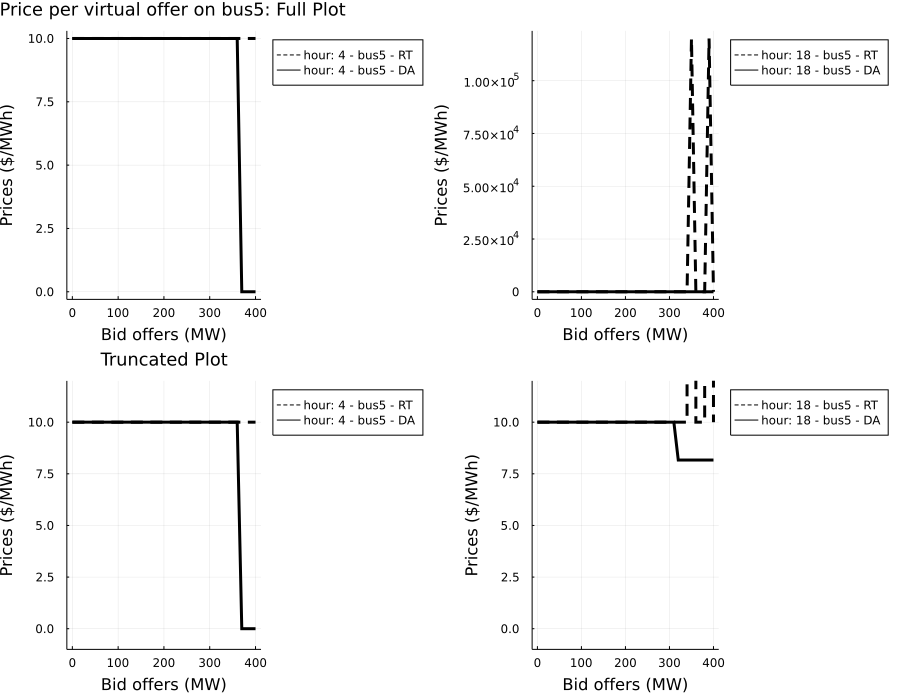

In [66]:
l = @layout grid(2,2)
#l = @layout [a{0.3w} [grid(2,2) b{0.2h}]]

plot(plt_p_f[4,1],plt_p_f[4,2],plt_p_t[4,1],plt_p_t[4,2],layout=l,size=(900,700),title=title=["   Price per virtual offer on bus5: Full Plot" "" "Truncated Plot" ""], titlefont = font(12)) 

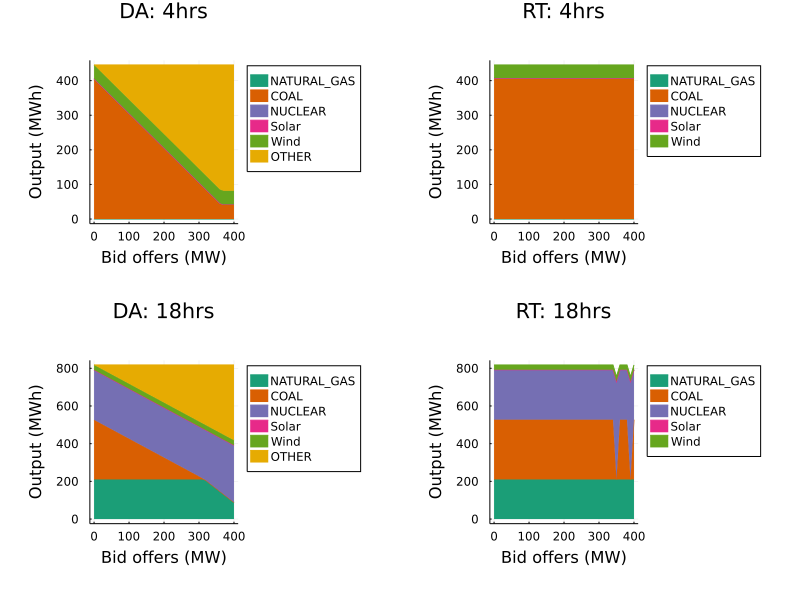

In [67]:
plot(plt_g[4,1,1], plt_g[4,1,2],plt_g[4,2,1], plt_g[4,2,2],layout=4,title=["DA: 4hrs" "RT: 4hrs" "DA: 18hrs" "RT: 18hrs"])

##  Market analysis

### CASE5:  Reserve false

In [73]:
df[5,:]

,Network,Ramp,Minimal_generation
,Any,Any,Any
5,"Dict(""RT""=>DCPPowerModel, ""DA""=>DCPPowerModel)","Dict(""RT""=>1, ""DA""=>1)","Dict(""RT""=>1, ""DA""=>1)"


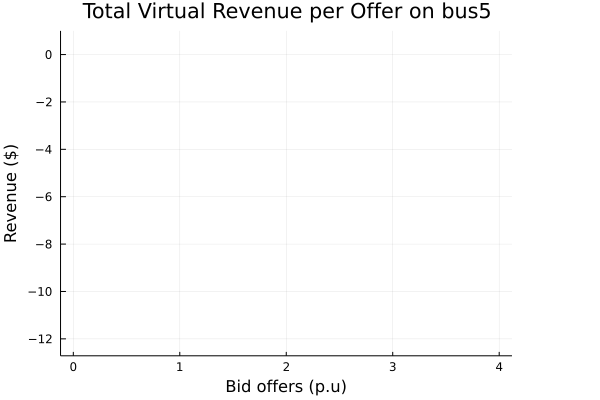

In [69]:
plt_sr[5]

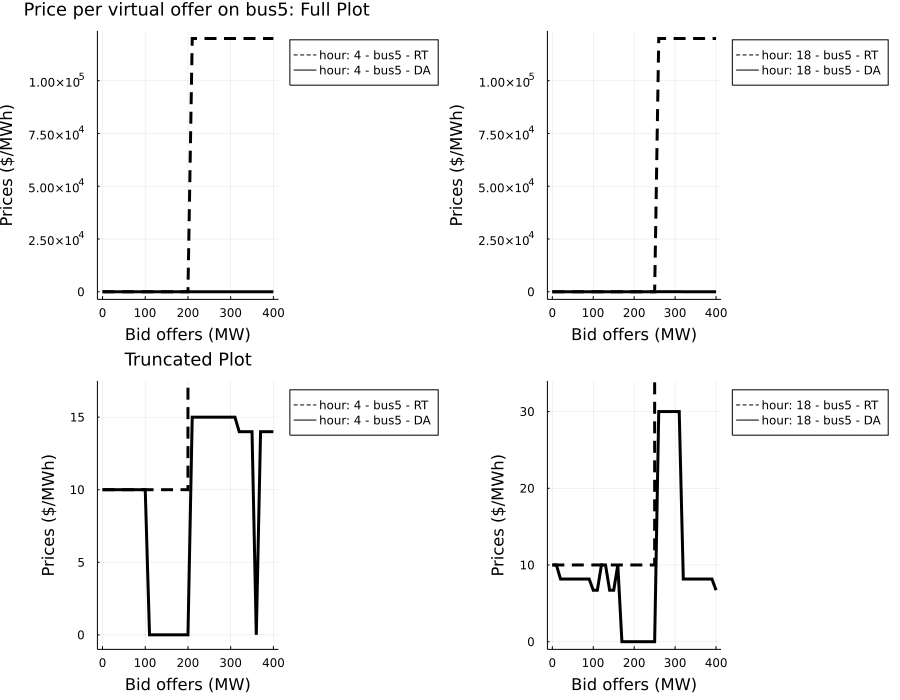

In [70]:
l = @layout grid(2,2)
#l = @layout [a{0.3w} [grid(2,2) b{0.2h}]]

plot(plt_p_f[5,1],plt_p_f[5,2],plt_p_t[5,1],plt_p_t[5,2],layout=l,size=(900,700),title=title=["   Price per virtual offer on bus5: Full Plot" "" "Truncated Plot" ""], titlefont = font(12)) 

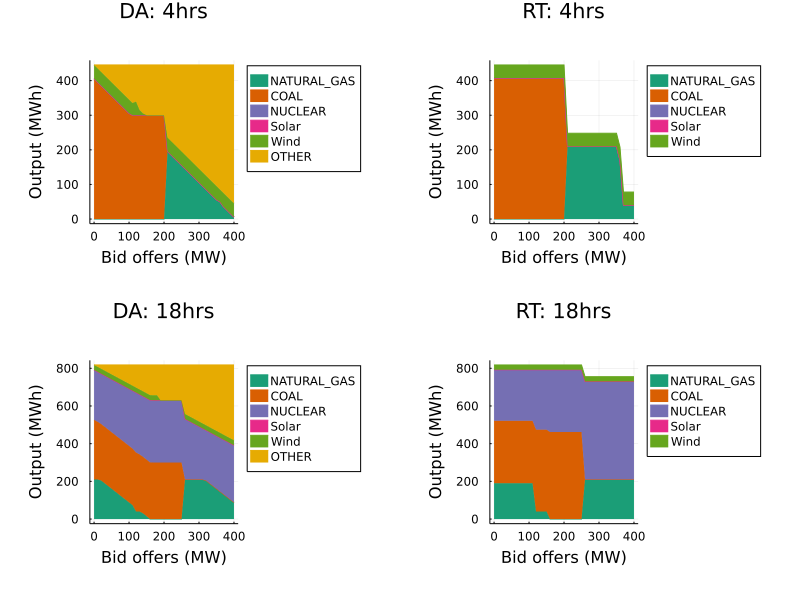

In [71]:
plot(plt_g[5,1,1], plt_g[5,1,2],plt_g[5,2,1], plt_g[5,2,2],layout=4,title=["DA: 4hrs" "RT: 4hrs" "DA: 18hrs" "RT: 18hrs"])